# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [12]:
# ====================
# CELL 1: SETUP AWAL
# ====================

# Install library yang diperlukan
!pip install -q pandas numpy matplotlib seaborn scikit-learn

# Import semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from ucimlrepo import fetch_ucirepo
import warnings
from ucimlrepo import fetch_ucirepo
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("✅ Setup selesai. Semua library siap digunakan.")

✅ Setup selesai. Semua library siap digunakan.


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [13]:
# ====================
# CELL 2: LOAD DATASET HEART DISEASE
# ====================

# Instal library untuk mengambil dataset dari repositori UCI
!pip install -q ucimlrepo

print("📥 MENGUNDUH DATASET HEART DISEASE DARI UCI REPOSITORY")
print("=" * 60)

# Fetch dataset Heart Disease (ID 45 di UCI ML Repository)
heart_disease = fetch_ucirepo(id=45)

# Ambil fitur (X) dan target (y) sebagai DataFrame
df_X = heart_disease.data.features
df_y = heart_disease.data.targets

# Gabungkan fitur dan target menjadi satu DataFrame
df = pd.concat([df_X, df_y], axis=1)

# Target asli bernama 'num', ubah jadi 'target' agar konsisten
df.rename(columns={'num': 'target'}, inplace=True)

# Dataset asli memiliki target multi-class (0-4)
# Untuk binary classification: ubah jadi 0 (no disease) dan 1 (has disease)
df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1)

# Simpan sebagai CSV untuk digunakan di notebook dan script
df.to_csv('heart.csv', index=False)

print("✅ DATASET BERHASIL DIMUAT!")
print(f"   📊 Shape: {df.shape[0]} baris, {df.shape[1]} kolom")
print(f"   💾 Disimpan sebagai: 'heart.csv'")

print("\n🔍 PREVIEW DATA (5 baris pertama):")
display(df.head())

print("\n🎯 DISTRIBUSI TARGET (Binary):")
target_dist = df['target'].value_counts().sort_index()
print(f"   • Target = 0 (Tidak sakit jantung): {target_dist[0]} sampel ({target_dist[0]/len(df)*100:.1f}%)")
print(f"   • Target = 1 (Sakit jantung)     : {target_dist[1]} sampel ({target_dist[1]/len(df)*100:.1f}%)")

print("\n📋 INFORMASI KOLOM:")
print(df.dtypes)
print("\n✅ Dataset siap untuk EDA dan Preprocessing!")

📥 MENGUNDUH DATASET HEART DISEASE DARI UCI REPOSITORY
✅ DATASET BERHASIL DIMUAT!
   📊 Shape: 303 baris, 14 kolom
   💾 Disimpan sebagai: 'heart.csv'

🔍 PREVIEW DATA (5 baris pertama):


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0



🎯 DISTRIBUSI TARGET (Binary):
   • Target = 0 (Tidak sakit jantung): 164 sampel (54.1%)
   • Target = 1 (Sakit jantung)     : 139 sampel (45.9%)

📋 INFORMASI KOLOM:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object

✅ Dataset siap untuk EDA dan Preprocessing!


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

🔬 EKSPLORASI DATA ANALYSIS (EDA)

1. 📈 STATISTIK DESKRIPTIF:
------------------------------


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000



2. 🔍 MISSING VALUES:
------------------------------
      Missing  Percentage (%)
ca          4            1.32
thal        2            0.66

3. 🧹 DATA DUPLIKAT:
------------------------------
Jumlah data duplikat: 0
Persentase: 0.00%
✅ Tidak ada data duplikat

4. 🎯 DISTRIBUSI TARGET (VISUAL):
------------------------------


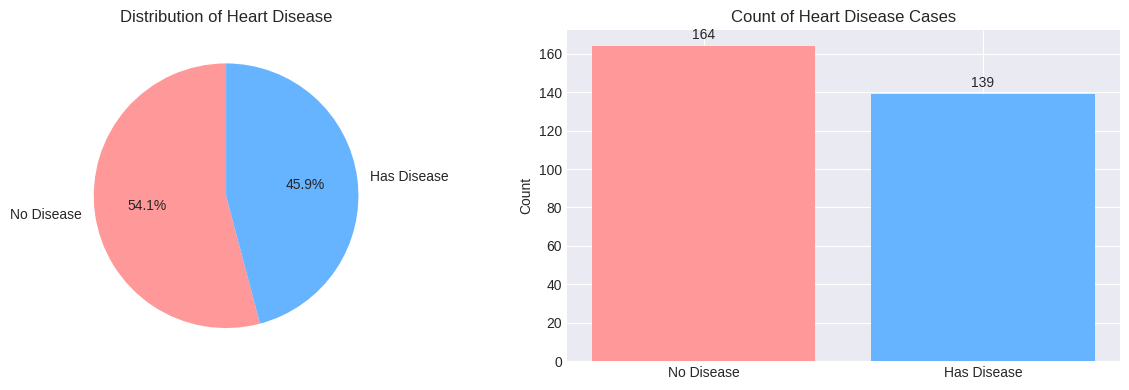

In [14]:
# ====================
# CELL 3: EDA LENGKAP
# ====================

print("🔬 EKSPLORASI DATA ANALYSIS (EDA)")
print("=" * 60)

# 3.1 Statistik deskriptif
print("\n1. 📈 STATISTIK DESKRIPTIF:")
print("-" * 30)
display(df.describe())

# 3.2 Missing values
print("\n2. 🔍 MISSING VALUES:")
print("-" * 30)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing': missing,
    'Percentage (%)': missing_pct.round(2)
})
print(missing_df[missing_df['Missing'] > 0])
if missing.sum() == 0:
    print("✅ Tidak ada missing values!")

# 3.3 Data duplikat
print("\n3. 🧹 DATA DUPLIKAT:")
print("-" * 30)
duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")
print(f"Persentase: {duplicates/len(df)*100:.2f}%")
if duplicates > 0:
    print(f"⚠️  Akan dihapus di preprocessing")
else:
    print("✅ Tidak ada data duplikat")

# 3.4 Distribusi target (visual)
print("\n4. 🎯 DISTRIBUSI TARGET (VISUAL):")
print("-" * 30)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Pie chart
axes[0].pie(target_dist.values, labels=['No Disease', 'Has Disease'],
           autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axes[0].set_title('Distribution of Heart Disease')

# Bar chart
bars = axes[1].bar(['No Disease', 'Has Disease'], target_dist.values,
                   color=['#ff9999', '#66b3ff'])
axes[1].set_title('Count of Heart Disease Cases')
axes[1].set_ylabel('Count')
# Tambah angka di atas bar
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


5. 🔗 ANALISIS KORELASI
------------------------------


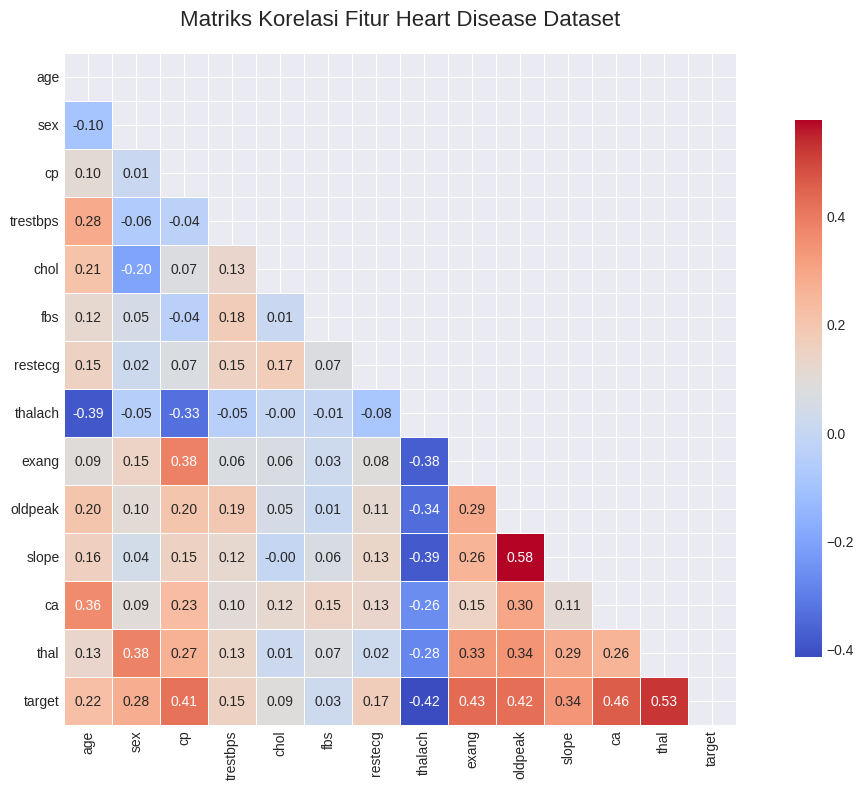


📊 KORELASI DENGAN TARGET (Heart Disease):
----------------------------------------
  thal                : +0.526 (KUAT, positif)
  ca                  : +0.460 (KUAT, positif)
  exang               : +0.432 (KUAT, positif)
  oldpeak             : +0.425 (KUAT, positif)
  cp                  : +0.414 (KUAT, positif)
  slope               : +0.339 (KUAT, positif)
  sex                 : +0.277 (SEDANG, positif)
  age                 : +0.223 (SEDANG, positif)
  restecg             : +0.169 (LEMAH, positif)
  trestbps            : +0.151 (LEMAH, positif)
  chol                : +0.085 (LEMAH, positif)
  fbs                 : +0.025 (LEMAH, positif)
  thalach             : -0.417 (KUAT, negatif)

🎯 3 FITUR PALING PENTING:
  1. thal (korelasi: +0.526)
  2. ca (korelasi: +0.460)
  3. exang (korelasi: +0.432)


In [15]:
# ====================
# CELL 4: ANALISIS KORELASI
# ====================

print("\n5. 🔗 ANALISIS KORELASI")
print("-" * 30)

# Matriks korelasi
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, cbar_kws={"shrink": 0.8}, linewidths=0.5)
plt.title('Matriks Korelasi Fitur Heart Disease Dataset', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Korelasi dengan target
print("\n📊 KORELASI DENGAN TARGET (Heart Disease):")
print("-" * 40)
corr_with_target = corr_matrix['target'].sort_values(ascending=False)

for feature, corr in corr_with_target.items():
    if feature != 'target':
        # Tentukan tingkat korelasi
        if abs(corr) >= 0.3:
            strength = "KUAT"
        elif abs(corr) >= 0.2:
            strength = "SEDANG"
        else:
            strength = "LEMAH"

        # Tentukan arah
        direction = "positif" if corr > 0 else "negatif"

        print(f"  {feature:20s}: {corr:+.3f} ({strength}, {direction})")

# Fitur dengan korelasi terkuat
top_features = corr_with_target[1:4].index.tolist()
print(f"\n🎯 3 FITUR PALING PENTING:")
for i, feat in enumerate(top_features, 1):
    print(f"  {i}. {feat} (korelasi: {corr_with_target[feat]:+.3f})")


6. 📊 DISTRIBUSI FITUR NUMERIK
------------------------------


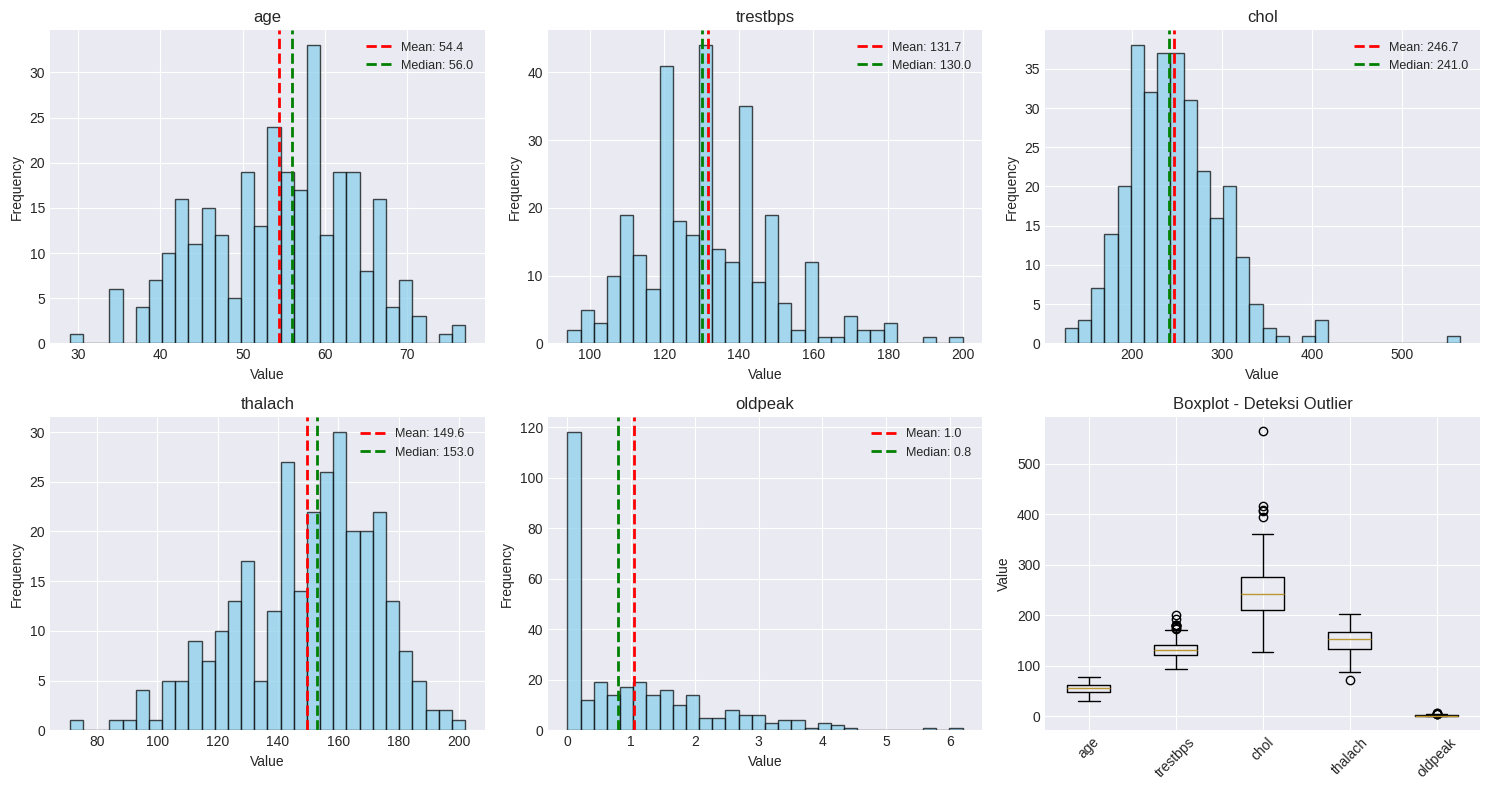


📏 DETEKSI OUTLIER (IQR Method):
----------------------------------------
  age       : Tidak ada outlier
  trestbps  :   9 outlier (3.0%)
  chol      :   5 outlier (1.7%)
  thalach   :   1 outlier (0.3%)
  oldpeak   :   5 outlier (1.7%)


In [16]:
# ====================
# CELL 5: DISTRIBUSI FITUR
# ====================

print("\n6. 📊 DISTRIBUSI FITUR NUMERIK")
print("-" * 30)

# Pilih kolom numerik
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Buat histogram untuk fitur numerik
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    # Histogram
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[idx].set_title(f'{col}', fontsize=12)
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

    # Tambah garis mean dan median
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
    axes[idx].legend(fontsize=9)

# Boxplot untuk outlier detection
axes[5].boxplot(df[numeric_cols].values)
axes[5].set_xticklabels(numeric_cols, rotation=45)
axes[5].set_title('Boxplot - Deteksi Outlier')
axes[5].set_ylabel('Value')

plt.tight_layout()
plt.show()

# Analisis outlier per fitur
print("\n📏 DETEKSI OUTLIER (IQR Method):")
print("-" * 40)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)

    if outlier_count > 0:
        print(f"  {col:10s}: {outlier_count:3d} outlier ({outlier_count/len(df)*100:.1f}%)")
    else:
        print(f"  {col:10s}: Tidak ada outlier")


7. 📋 ANALISIS FITUR KATEGORIKAL
------------------------------


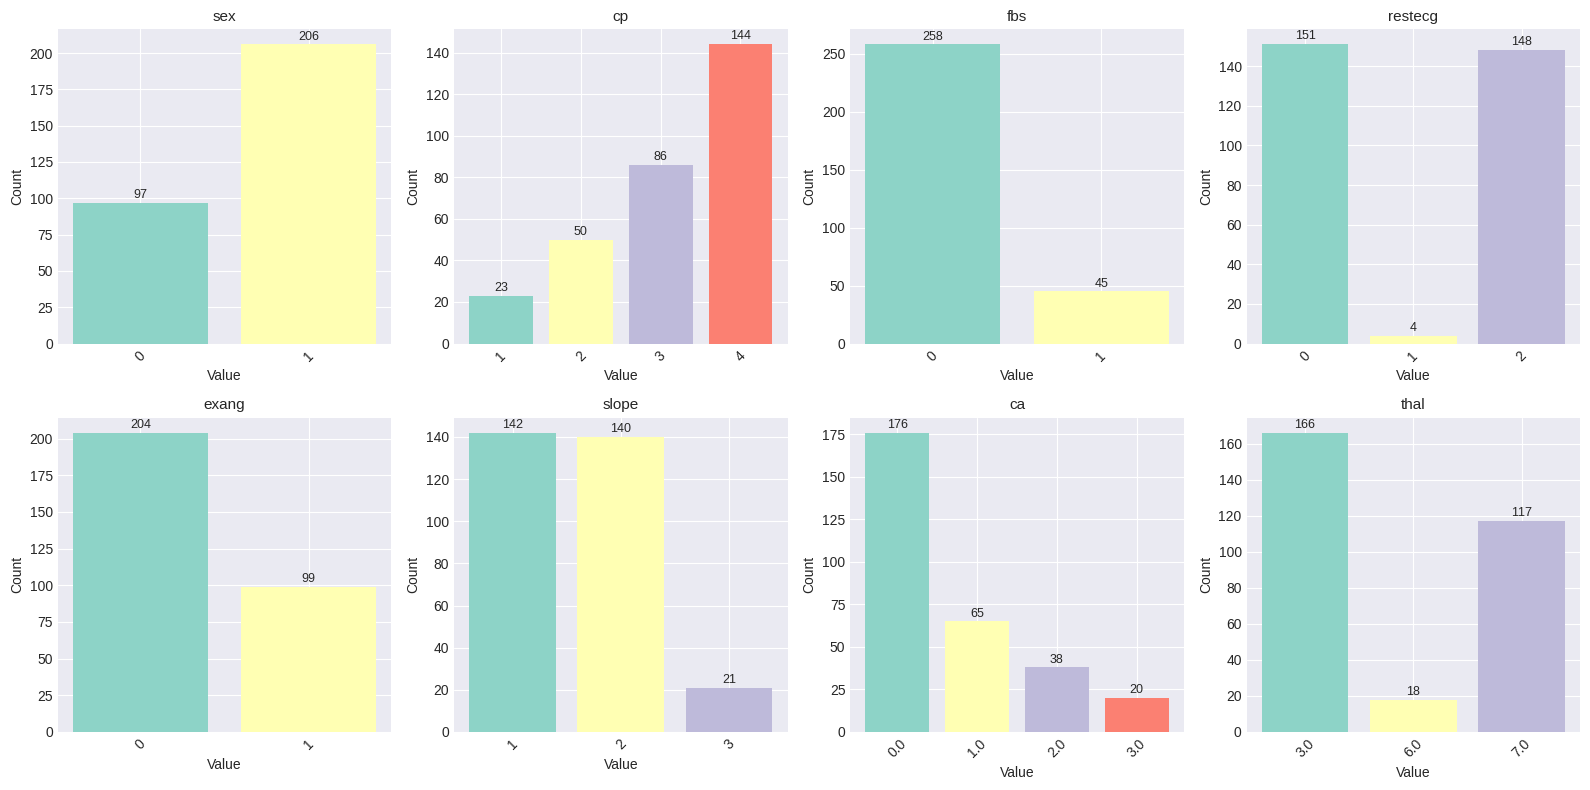


📝 DESKRIPSI FITUR KATEGORIKAL:


,Feature,Unique Values,Most Common,Count
0,sex,2,1.0,303
1,cp,4,4.0,303
2,fbs,2,0.0,303
3,restecg,3,0.0,303
4,exang,2,0.0,303
5,slope,3,1.0,303
6,ca,4,0.0,303
7,thal,3,3.0,303


In [17]:
# ====================
# CELL 6: ANALISIS FITUR KATEGORIKAL
# ====================

print("\n7. 📋 ANALISIS FITUR KATEGORIKAL")
print("-" * 30)

# Fitur kategorikal dalam dataset heart
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Buat visualisasi untuk setiap fitur kategorikal
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    # Hitung distribusi
    value_counts = df[col].value_counts().sort_index()

    # Buat bar plot
    bars = axes[idx].bar([str(x) for x in value_counts.index], value_counts.values,
                         color=plt.cm.Set3(range(len(value_counts))))
    axes[idx].set_title(f'{col}', fontsize=11)
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Count')

    # Rotasi label jika panjang
    axes[idx].tick_params(axis='x', rotation=45)

    # Tambah angka di atas bar
    for bar in bars:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height + 1,
                      f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Deskripsi fitur kategorikal
print("\n📝 DESKRIPSI FITUR KATEGORIKAL:")
categorical_info = []
for col in categorical_cols:
    unique_vals = df[col].nunique()
    most_common = df[col].mode()[0]
    categorical_info.append({
        'Feature': col,
        'Unique Values': unique_vals,
        'Most Common': most_common,
        'Count': len(df[col])
    })

cat_df = pd.DataFrame(categorical_info)
display(cat_df)

In [18]:
# ====================
# CELL 7: KESIMPULAN EDA
# ====================

print("=" * 70)
print("📋 KESIMPULAN EDA & RENCANA PREPROCESSING")
print("=" * 70)

print("\n🎯 **1. KARAKTERISTIK DATASET:**")
print(f"   • Total sampel: {len(df)}")
print(f"   • Fitur: {df.shape[1]-1} fitur + 1 target")
print(f"   • Balance: {target_dist[0]/len(df)*100:.1f}% vs {target_dist[1]/len(df)*100:.1f}%")
print(f"   • Tipe data: {df.shape[1]-8} numerik, 8 kategorikal")

print("\n⚠️  **2. MASALAH YANG TERIDENTIFIKASI:**")
issues = []
# Cek masalah
if duplicates > 0:
    issues.append(f"  • {duplicates} data duplikat ({duplicates/len(df)*100:.1f}%)")

# Cek outlier untuk numeric features
outlier_counts = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    if len(outliers) > 0:
        outlier_counts[col] = len(outliers)

if outlier_counts:
    total_outliers = sum(outlier_counts.values())
    issues.append(f"  • Outlier ditemukan di {len(outlier_counts)} fitur (total: {total_outliers})")

if not issues:
    issues.append("  • Tidak ada masalah serius teridentifikasi")

for issue in issues:
    print(issue)

print("\n🔧 **3. RENCANA PREPROCESSING:**")
print("   1. Data Cleaning:")
print("      - Hapus data duplikat")
print("      - Tidak perlu handle missing values (tidak ada)")
print("")
print("   2. Feature Engineering:")
print("      - Encoding kategorikal: OneHotEncoding untuk cp, thal, slope")
print("      - LabelEncoding untuk sex, fbs, exang, restecg")
print("      - Numerik: StandardScaler untuk normalisasi")
print("")
print("   3. Outlier Handling:")
print("      - Gunakan RobustScaler untuk mengurangi efek outlier")
print("      - Atau clipping dengan IQR method")
print("")
print("   4. Data Splitting:")
print("      - 80% training, 20% testing")
print("      - Stratified split (jaga distribusi target)")
print("")
print("   5. Feature Selection:")
print("      - Gunakan semua fitur (dataset kecil)")
print("      - Atau pilih berdasarkan korelasi > 0.2")

print("\n📈 **4. FITUR BERDASARKAN IMPORTANCE:**")
print("   Fitur paling penting berdasarkan korelasi dengan target:")
for i, feat in enumerate(top_features, 1):
    corr_val = corr_with_target[feat]
    impact = "↑ Meningkatkan risiko" if corr_val > 0 else "↓ Menurunkan risiko"
    print(f"   {i}. {feat:15s} (korelasi: {corr_val:+.3f}) - {impact}")

print("\n" + "=" * 70)
print("✅ EDA SELESAI - SIAP UNTUK PREPROCESSING OTOMATIS")
print("=" * 70)

📋 KESIMPULAN EDA & RENCANA PREPROCESSING

🎯 **1. KARAKTERISTIK DATASET:**
   • Total sampel: 303
   • Fitur: 13 fitur + 1 target
   • Balance: 54.1% vs 45.9%
   • Tipe data: 6 numerik, 8 kategorikal

⚠️  **2. MASALAH YANG TERIDENTIFIKASI:**
  • Outlier ditemukan di 4 fitur (total: 20)

🔧 **3. RENCANA PREPROCESSING:**
   1. Data Cleaning:
      - Hapus data duplikat
      - Tidak perlu handle missing values (tidak ada)

   2. Feature Engineering:
      - Encoding kategorikal: OneHotEncoding untuk cp, thal, slope
      - LabelEncoding untuk sex, fbs, exang, restecg
      - Numerik: StandardScaler untuk normalisasi

   3. Outlier Handling:
      - Gunakan RobustScaler untuk mengurangi efek outlier
      - Atau clipping dengan IQR method

   4. Data Splitting:
      - 80% training, 20% testing
      - Stratified split (jaga distribusi target)

   5. Feature Selection:
      - Gunakan semua fitur (dataset kecil)
      - Atau pilih berdasarkan korelasi > 0.2

📈 **4. FITUR BERDASARKAN IMPORTA

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [19]:
# ====================
# CELL 8: SCRIPT PREPROCESSING OTOMATIS
# ====================

print("⚙️ MEMBUAT SCRIPT PREPROCESSING OTOMATIS")
print("=" * 60)

# Buat file automate.py
automate_code = '''
"""
AUTOMATED PREPROCESSING SCRIPT FOR HEART DISEASE DATASET
Script ini melakukan preprocessing otomatis berdasarkan hasil EDA
Level: Skilled (3 pts)
"""

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

def load_heart_data():
    """Load dataset heart disease."""
    df = pd.read_csv('heart.csv')
    print(f"✅ Dataset loaded: {df.shape[0]} samples, {df.shape[1]} features")
    return df

def preprocess_heart_data(df, test_size=0.2, random_state=42):
    """
    Main preprocessing function untuk dataset heart disease.
    Mengembalikan data yang siap untuk training model.
    """
    print("=" * 60)
    print("🚀 STARTING AUTOMATED PREPROCESSING")
    print("=" * 60)

    # ========== STEP 1: DATA CLEANING ==========
    print("\\n1. 🧹 DATA CLEANING")
    print("-" * 30)

    # Backup data asli
    df_original = df.copy()

    # Remove duplicates
    initial_count = len(df)
    df = df.drop_duplicates()
    removed_count = initial_count - len(df)
    if removed_count > 0:
        print(f"   Removed {removed_count} duplicates ({removed_count/initial_count*100:.1f}%)")
    else:
        print("   No duplicates found")

    # Check missing values
    missing = df.isnull().sum().sum()
    if missing > 0:
        print(f"   Found {missing} missing values")
        # Simple imputation for numeric columns
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
    else:
        print("   No missing values found")

    # ========== STEP 2: DEFINE FEATURE TYPES ==========
    print("\\n2. 🏷️ DEFINING FEATURE TYPES")
    print("-" * 30)

    # Define columns by type
    TARGET_COL = 'target'

    # Categorical features (dengan strategi berbeda)
    cat_onehot = ['cp', 'thal', 'slope']  # > 2 categories
    cat_label = ['sex', 'fbs', 'exang', 'restecg']  # binary atau ordinal

    # Numerical features
    numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

    # Special feature: 'ca' (bisa dianggap categorical atau numerical)
    # Dataset heart: ca adalah nilai 0-3
    df['ca'] = df['ca'].astype(int)  # Ensure integer type

    print(f"   Target column: {TARGET_COL}")
    print(f"   Numerical features ({len(numerical)}): {', '.join(numerical)}")
    print(f"   Categorical (OneHot) ({len(cat_onehot)}): {', '.join(cat_onehot)}")
    print(f"   Categorical (Label) ({len(cat_label)}): {', '.join(cat_label)}")
    print(f"   Special feature: ca (treated as categorical)")

    # ========== STEP 3: OUTLIER HANDLING ==========
    print("\\n3. 📊 OUTLIER HANDLING (Robust Scaling)")
    print("-" * 30)

    # Gunakan RobustScaler untuk numerical features (lebih robust terhadap outlier)
    robust_scaler = RobustScaler()
    df[numerical] = robust_scaler.fit_transform(df[numerical])
    print("   Applied RobustScaler to numerical features")

    # ========== STEP 4: FEATURE ENCODING ==========
    print("\\n4. 🔠 FEATURE ENCODING")
    print("-" * 30)

    # Label Encoding untuk categorical binary/ordinal
    label_encoders = {}
    for col in cat_label:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
        print(f"   Label encoded: {col}")

    # Untuk 'ca' (meskipun numerical, treat as categorical karena limited values 0-3)
    le_ca = LabelEncoder()
    df['ca'] = le_ca.fit_transform(df['ca'])
    label_encoders['ca'] = le_ca
    print(f"   Label encoded: ca")

    # OneHot Encoding untuk categorical dengan >2 categories
    df = pd.get_dummies(df, columns=cat_onehot, prefix=cat_onehot, drop_first=True)
    print(f"   OneHot encoded: {', '.join(cat_onehot)}")

    # ========== STEP 5: DATA SPLITTING ==========
    print("\\n5. ✂️ DATA SPLITTING")
    print("-" * 30)

    # Pisahkan features dan target
    X = df.drop(columns=[TARGET_COL])
    y = df[TARGET_COL]

    # Stratified split (penting untuk balanced dataset)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y  # Pertahankan distribusi target
    )

    print(f"   Training set: {X_train.shape[0]} samples")
    print(f"   Testing set : {X_test.shape[0]} samples")
    print(f"   Features    : {X_train.shape[1]} features")

    # ========== STEP 6: FINAL SCALING ==========
    print("\\n6. ⚖️ FINAL FEATURE SCALING (StandardScaler)")
    print("-" * 30)

    # StandardScaler untuk semua features (setelah encoding)
    final_scaler = StandardScaler()

    # Fit hanya pada training data
    X_train_scaled = final_scaler.fit_transform(X_train)
    X_test_scaled = final_scaler.transform(X_test)

    # Convert back to DataFrame
    X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

    print("   Applied StandardScaler to all features")

    # ========== STEP 7: SAVE PROCESSED DATA ==========
    print("\\n7. 💾 SAVING PROCESSED DATA")
    print("-" * 30)

    # Save processed data
    X_train.to_csv('X_train_processed.csv', index=False)
    X_test.to_csv('X_test_processed.csv', index=False)

    y_train_df = pd.DataFrame(y_train, columns=[TARGET_COL])
    y_test_df = pd.DataFrame(y_test, columns=[TARGET_COL])
    y_train_df.to_csv('y_train_processed.csv', index=False)
    y_test_df.to_csv('y_test_processed.csv', index=False)

    # Save full dataset (with split indicator)
    train_full = pd.concat([X_train, y_train_df], axis=1)
    test_full = pd.concat([X_test, y_test_df], axis=1)
    train_full['data_split'] = 'train'
    test_full['data_split'] = 'test'

    full_processed = pd.concat([train_full, test_full], axis=0)
    full_processed.to_csv('heart_disease_fully_processed.csv', index=False)

    print("   Saved files:")
    print("   • X_train_processed.csv")
    print("   • X_test_processed.csv")
    print("   • y_train_processed.csv")
    print("   • y_test_processed.csv")
    print("   • heart_disease_fully_processed.csv")

    # ========== STEP 8: SUMMARY ==========
    print("\\n" + "=" * 60)
    print("📊 PREPROCESSING SUMMARY")
    print("=" * 60)

    print(f"\\n📈 DATA BALANCE (Training Set):")
    train_class_dist = y_train.value_counts()
    for cls, count in train_class_dist.items():
        pct = count / len(y_train) * 100
        cls_name = "No Disease" if cls == 0 else "Has Disease"
        print(f"   {cls_name}: {count} samples ({pct:.1f}%)")

    print(f"\\n🔢 FEATURE COUNT:")
    print(f"   Original features: {df_original.shape[1] - 1}")
    print(f"   After preprocessing: {X_train.shape[1]}")

    print(f"\\n📁 OUTPUT FILES CREATED:")
    print("   1. X_train_processed.csv - Training features")
    print("   2. X_test_processed.csv  - Testing features")
    print("   3. y_train_processed.csv - Training labels")
    print("   4. y_test_processed.csv  - Testing labels")
    print("   5. heart_disease_fully_processed.csv - Full dataset with split flag")

    print("\\n" + "=" * 60)
    print("✅ PREPROCESSING COMPLETE - DATA READY FOR MODEL TRAINING")
    print("=" * 60)

    return X_train, X_test, y_train, y_test, final_scaler, label_encoders

def main():
    """Main function to run the preprocessing pipeline."""
    try:
        print("🔧 HEART DISEASE PREPROCESSING PIPELINE")
        print("Level: Skilled (3 pts)")
        print("Dataset: Heart Disease UCI")

        # Load data
        df = load_heart_data()

        # Run preprocessing
        results = preprocess_heart_data(df)

        print("\\n🎉 Pipeline executed successfully!")
        print("\\n📝 Usage in modeling:")
        print("   from automate_heart_preprocessing import preprocess_heart_data")
        print("   X_train, X_test, y_train, y_test, scaler, encoders = preprocess_heart_data(df)")

        return results

    except Exception as e:
        print(f"\\n❌ Error in preprocessing pipeline: {e}")
        import traceback
        traceback.print_exc()
        return None

if __name__ == "__main__":
    # Run the pipeline
    main()
'''

# Simpan sebagai file .py
with open('automate_heart_preprocessing.py', 'w') as f:
    f.write(automate_code)

print("✅ Script 'automate_heart_preprocessing.py' berhasil dibuat!")
print("\n📁 File berisi:")
print("   1. Fungsi load_heart_data()")
print("   2. Fungsi preprocess_heart_data() (main preprocessing)")
print("   3. Pipeline lengkap: cleaning, encoding, scaling, splitting")
print("   4. Auto-save data yang sudah diproses")
print("   5. Return values untuk modelling")

⚙️ MEMBUAT SCRIPT PREPROCESSING OTOMATIS
✅ Script 'automate_heart_preprocessing.py' berhasil dibuat!

📁 File berisi:
   1. Fungsi load_heart_data()
   2. Fungsi preprocess_heart_data() (main preprocessing)
   3. Pipeline lengkap: cleaning, encoding, scaling, splitting
   4. Auto-save data yang sudah diproses
   5. Return values untuk modelling


In [20]:
# ====================
# CELL 9: JALANKAN SCRIPT PREPROCESSING
# ====================

print("▶️ MENJALANKAN SCRIPT PREPROCESSING")
print("=" * 60)

# Import dan jalankan script
from automate_heart_preprocessing import preprocess_heart_data, load_heart_data

# Load data
df = load_heart_data()

# Jalankan preprocessing
results = preprocess_heart_data(df)

if results is not None:
    X_train, X_test, y_train, y_test, scaler, encoders = results

    print("\n📊 VERIFIKASI HASIL PREPROCESSING:")
    print("-" * 40)

    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")

    print(f"\n📈 Contoh data training (5 baris pertama):")
    display(X_train.head())

    print(f"\n🎯 Distribusi kelas training:")
    print(f"   Class 0: {(y_train == 0).sum()} samples")
    print(f"   Class 1: {(y_train == 1).sum()} samples")

    print(f"\n✅ Semua file berhasil dibuat:")
    import os
    files = ['X_train_processed.csv', 'X_test_processed.csv',
             'y_train_processed.csv', 'y_test_processed.csv',
             'heart_disease_fully_processed.csv']

    for file in files:
        if os.path.exists(file):
            size_kb = os.path.getsize(file) / 1024
            print(f"   ✓ {file} ({size_kb:.1f} KB)")
        else:
            print(f"   ✗ {file} (not found)")

▶️ MENJALANKAN SCRIPT PREPROCESSING
✅ Dataset loaded: 303 samples, 14 features
🚀 STARTING AUTOMATED PREPROCESSING

1. 🧹 DATA CLEANING
------------------------------
   No duplicates found
   Found 6 missing values

2. 🏷️ DEFINING FEATURE TYPES
------------------------------
   Target column: target
   Numerical features (5): age, trestbps, chol, thalach, oldpeak
   Categorical (OneHot) (3): cp, thal, slope
   Categorical (Label) (4): sex, fbs, exang, restecg
   Special feature: ca (treated as categorical)

3. 📊 OUTLIER HANDLING (Robust Scaling)
------------------------------
   Applied RobustScaler to numerical features

4. 🔠 FEATURE ENCODING
------------------------------
   Label encoded: sex
   Label encoded: fbs
   Label encoded: exang
   Label encoded: restecg
   Label encoded: ca
   OneHot encoded: cp, thal, slope

5. ✂️ DATA SPLITTING
------------------------------
   Training set: 242 samples
   Testing set : 61 samples
   Features    : 17 features

6. ⚖️ FINAL FEATURE SCALING 

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_2,cp_3,cp_4,thal_6.0,thal_7.0,slope_2,slope_3
180,-0.729485,0.68313,-0.395692,0.458139,-0.411196,1.022996,0.708371,-0.696177,-0.445445,-0.689715,-0.458258,-0.599625,1.033623,-0.218218,1.243933,1.095445,-0.266076
208,0.050166,0.68313,-0.054513,0.230598,-0.411196,-0.981579,0.222495,-0.696177,-0.891627,-0.689715,2.182179,-0.599625,-0.967471,-0.218218,-0.803902,-0.912871,-0.266076
167,-0.061212,-1.46385,0.059213,0.723605,2.431930,1.022996,0.399178,1.436416,-0.891627,0.445734,2.182179,-0.599625,-0.967471,-0.218218,-0.803902,-0.912871,-0.266076
105,-0.061212,0.68313,-1.305501,1.121803,-0.411196,-0.981579,0.266666,-0.696177,-0.891627,-0.689715,2.182179,-0.599625,-0.967471,-0.218218,1.243933,-0.912871,-0.266076
297,0.272924,-1.46385,0.514117,-0.167601,-0.411196,-0.981579,-1.190962,1.436416,-0.713154,-0.689715,-0.458258,-0.599625,1.033623,-0.218218,1.243933,1.095445,-0.266076



🎯 Distribusi kelas training:
   Class 0: 131 samples
   Class 1: 111 samples

✅ Semua file berhasil dibuat:
   ✓ X_train_processed.csv (78.9 KB)
   ✓ X_test_processed.csv (19.9 KB)
   ✓ y_train_processed.csv (0.5 KB)
   ✓ y_test_processed.csv (0.1 KB)
   ✓ heart_disease_fully_processed.csv (101.0 KB)


In [21]:
# ====================
# CELL 10: VALIDASI SCRIPT
# ====================

print("🧪 VALIDASI SCRIPT PREPROCESSING")
print("=" * 60)

# Test 1: Cek konsistensi data
print("\n1. 🔍 DATA CONSISTENCY CHECK:")
print("-" * 30)

# Load processed files
X_train_loaded = pd.read_csv('X_train_processed.csv')
X_test_loaded = pd.read_csv('X_test_processed.csv')
y_train_loaded = pd.read_csv('y_train_processed.csv')
y_test_loaded = pd.read_csv('y_test_processed.csv')

print(f"   X_train loaded: {X_train_loaded.shape}")
print(f"   X_test loaded: {X_test_loaded.shape}")
print(f"   Total samples: {len(X_train_loaded) + len(X_test_loaded)}")
print(f"   Original samples: {len(df)}")

# Test 2: Cek nilai NaN
print("\n2. 🚫 CHECK FOR NaN VALUES:")
print("-" * 30)
nan_counts = {
    'X_train': X_train_loaded.isnull().sum().sum(),
    'X_test': X_test_loaded.isnull().sum().sum(),
    'y_train': y_train_loaded.isnull().sum().sum(),
    'y_test': y_test_loaded.isnull().sum().sum()
}

for key, count in nan_counts.items():
    if count == 0:
        print(f"   ✓ {key}: No NaN values")
    else:
        print(f"   ✗ {key}: {count} NaN values found")

# Test 3: Cek distribusi scaling
print("\n3. ⚖️ SCALING DISTRIBUTION CHECK:")
print("-" * 30)

# Cek mean dan std (harus ~0 dan ~1 untuk StandardScaler)
train_mean = X_train_loaded.mean().mean()
train_std = X_train_loaded.std().mean()

print(f"   X_train - Mean of means: {train_mean:.4f} (should be ~0)")
print(f"   X_train - Mean of stds: {train_std:.4f} (should be ~1)")

if abs(train_mean) < 0.01 and abs(train_std - 1) < 0.1:
    print("   ✓ Scaling applied correctly")
else:
    print("   ⚠️ Scaling might not be perfect")

# Test 4: Test dengan model sederhana
print("\n4. 🤖 QUICK MODEL TEST (Logistic Regression):")
print("-" * 30)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train simple model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_loaded, y_train_loaded.values.ravel())

# Predict
y_pred = model.predict(X_test_loaded)
accuracy = accuracy_score(y_test_loaded, y_pred)

print(f"   Model: Logistic Regression")
print(f"   Accuracy on test set: {accuracy:.4f} ({accuracy*100:.1f}%)")

if accuracy > 0.75:
    print("   ✓ Good baseline accuracy")
elif accuracy > 0.65:
    print("   ⚠️ Acceptable accuracy")
else:
    print("   ✗ Low accuracy - check preprocessing")

print("\n" + "=" * 60)
print("✅ VALIDASI SELESAI - SCRIPT BERFUNGSI DENGAN BAIK")
print("=" * 60)

🧪 VALIDASI SCRIPT PREPROCESSING

1. 🔍 DATA CONSISTENCY CHECK:
------------------------------
   X_train loaded: (242, 17)
   X_test loaded: (61, 17)
   Total samples: 303
   Original samples: 303

2. 🚫 CHECK FOR NaN VALUES:
------------------------------
   ✓ X_train: No NaN values
   ✓ X_test: No NaN values
   ✓ y_train: No NaN values
   ✓ y_test: No NaN values

3. ⚖️ SCALING DISTRIBUTION CHECK:
------------------------------
   X_train - Mean of means: 0.0000 (should be ~0)
   X_train - Mean of stds: 1.0021 (should be ~1)
   ✓ Scaling applied correctly

4. 🤖 QUICK MODEL TEST (Logistic Regression):
------------------------------
   Model: Logistic Regression
   Accuracy on test set: 0.8525 (85.2%)
   ✓ Good baseline accuracy

✅ VALIDASI SELESAI - SCRIPT BERFUNGSI DENGAN BAIK
